# Benchmark

This benchmark will compare these solvers and their variant:
- Brute Force (Time limit sets to 100 seconds)
- Gurobi (Time limit sets to 10 seconds)
- Gurobi (Time limit sets to 100 seconds)
- Fixstars (Time limit sets to 10 seconds)

The benchmark will run on these specifications:
- $n \in (4, 5, 6, 7, 8, 10, 12, 15, 20, 42, 69)$
- Constraint weight set to 1000, 1000000, 1000000000
- Each test will be run 3 times, total test would be 3\*3\*11 = 99 runs

In [3]:
import json
from pprint import pprint

with open('result.json') as f:
    data = json.load(f)
    
pprint(data[0])

{'avg_edge_weigh': 3.0,
 'distance_matrix': [[0, 6, 5, 1], [6, 0, 3, 2], [5, 3, 0, 7], [1, 2, 7, 0]],
 'max_edge_weight': 7,
 'nodes': 4,
 'qp_weight': 1000000,
 'solvers_results': [{'execution_time': 0.0,
                      'name': 'Brute Force',
                      'objective': 11,
                      'total_time': 0.0},
                     {'execution_time': 0.126603,
                      'name': 'Gurobi 10s',
                      'objective': 11.0,
                      'total_time': 0.21416783332824707},
                     {'execution_time': 0.009787,
                      'name': 'Gurobi 100s',
                      'objective': 11.0,
                      'total_time': 0.02444934844970703},
                     {'execution_time': 0.043677,
                      'name': 'Fixstars 1s',
                      'objective': 11.0,
                      'total_time': 3.1903886795043945},
                     {'execution_time': 0.03785,
                      'name': 'Fixstars

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

### Success Count by Solver vs $n$

D-Wave starts to fail at $n$ = 7, while Fixstars and Gurobi can still solve the problem.

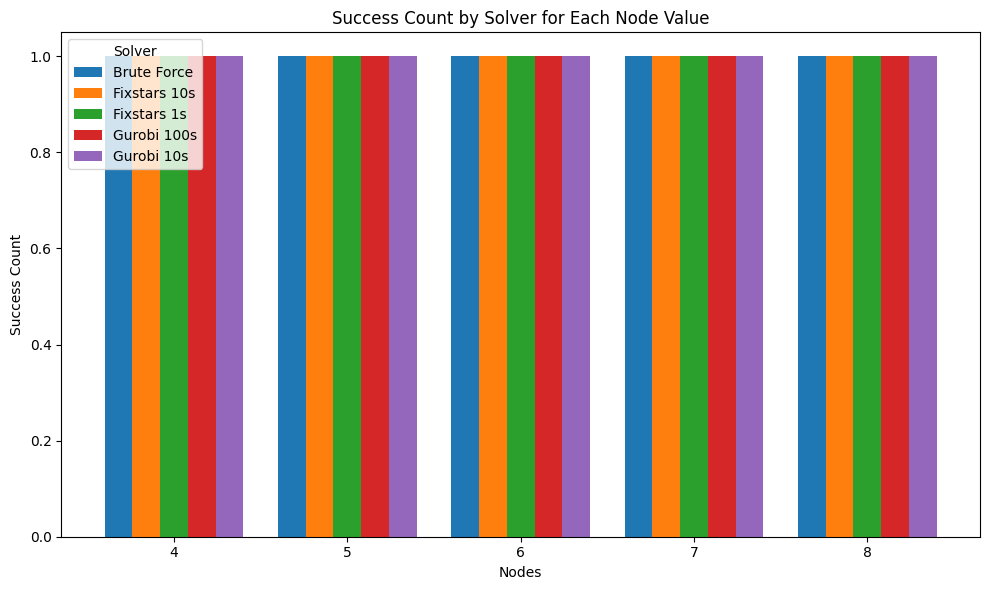

In [7]:
# Prepare data for plotting
records = []
for item in data:
    nodes = item["nodes"]
    for solver in item["solvers_results"]:
        success = solver["objective"] is not None and solver["execution_time"] is not None
        records.append({"nodes": nodes, "solver": solver["name"], "success": int(success)})

# Convert to DataFrame
df = pd.DataFrame(records)

# Group by nodes and solver to count successes
success_counts = df.groupby(["nodes", "solver"]).sum().reset_index()

# Pivot data for plotting
pivot_data = success_counts.pivot(index="nodes", columns="solver", values="success").fillna(0)

# # Ensure legend order
# solver_order = ["Brute Force", "Gurobi 10s", "Gurobi 1000s", "Fixstars", "D-Wave"]
# pivot_data = pivot_data[solver_order]

# Plot multi-bar chart
pivot_data.plot(kind="bar", figsize=(10, 6), width=0.8)
plt.title("Success Count by Solver for Each Node Value")
plt.xlabel("Nodes")
plt.ylabel("Success Count")
plt.legend(title="Solver", loc="upper left")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Success Cunt by Solver vs Constraint Weight

### Success Count by Solver vs Nodes and Constraint Weight
Brute Force is omitted as it will always success given enough time


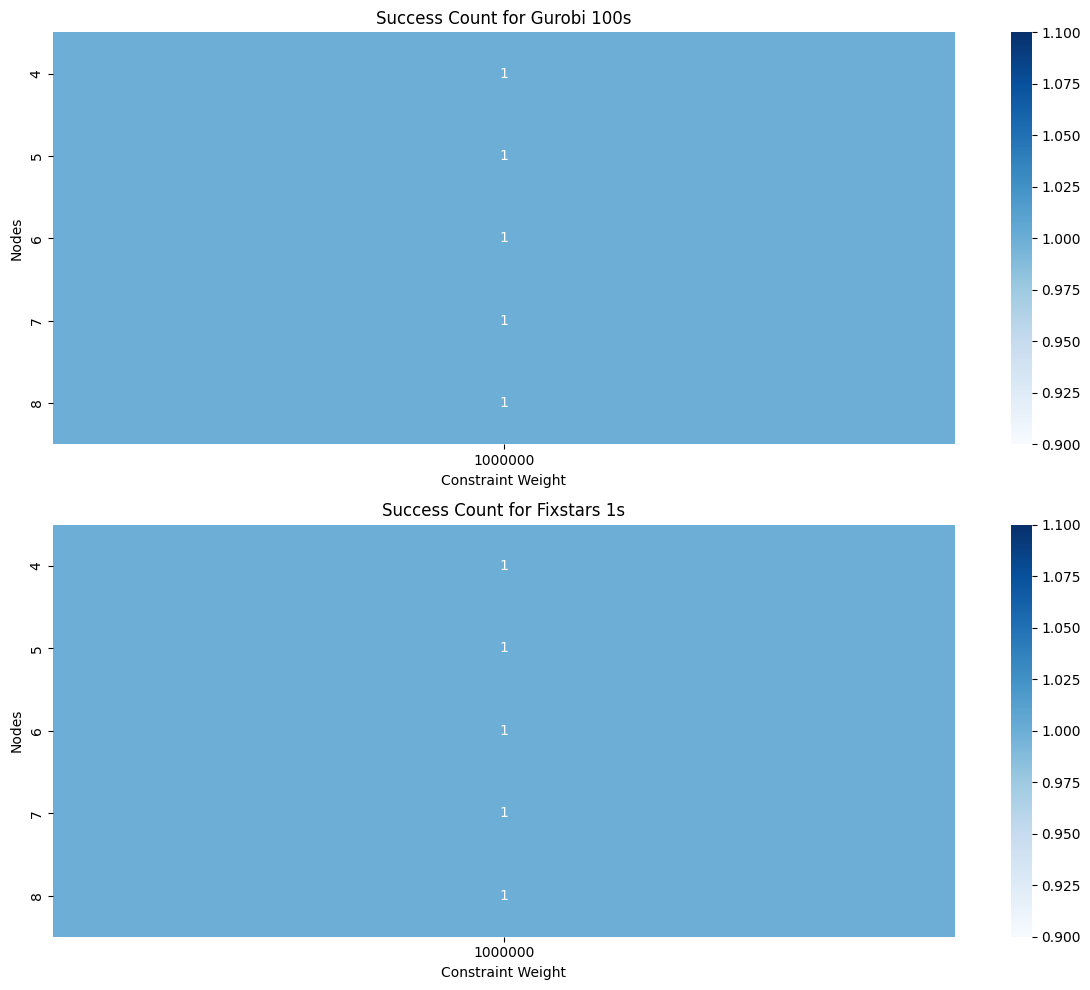

In [9]:
# Prepare data for plotting
records = []
for item in data:
    nodes = item["nodes"]
    qp_weight = item["qp_weight"]
    for solver in item["solvers_results"]:
        success = solver["objective"] is not None and solver["execution_time"] is not None
        records.append({"nodes": nodes, "qp_weight": qp_weight, "solver": solver["name"], "success": int(success)})

# Convert to DataFrame
df = pd.DataFrame(records)

# Group by nodes, qp_weight, and solver to count successes
success_counts = df.groupby(["nodes", "qp_weight", "solver"]).sum().reset_index()

# Filter solvers to include only Gurobi 1000s, Fixstars, and D-Wave
filtered_solvers = ["Gurobi 100s", "Fixstars 1s"]
filtered_data = success_counts[success_counts["solver"].isin(filtered_solvers)]

# Plot multi heatmaps for each solver
fig, axes = plt.subplots(nrows=len(filtered_solvers), figsize=(12, 5 * len(filtered_solvers)))
if len(filtered_solvers) == 1:  # If there's only one solver, axes is not a list
    axes = [axes]

for ax, solver in zip(axes, filtered_solvers):
    solver_data = filtered_data[filtered_data["solver"] == solver]
    heatmap_data = solver_data.pivot(index="nodes", columns="qp_weight", values="success").fillna(0)
    sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"Success Count for {solver}")
    ax.set_xlabel("Constraint Weight")
    ax.set_ylabel("Nodes")

plt.tight_layout()
plt.show()

### Box and Whisker Plot of Execution time vs Nodes

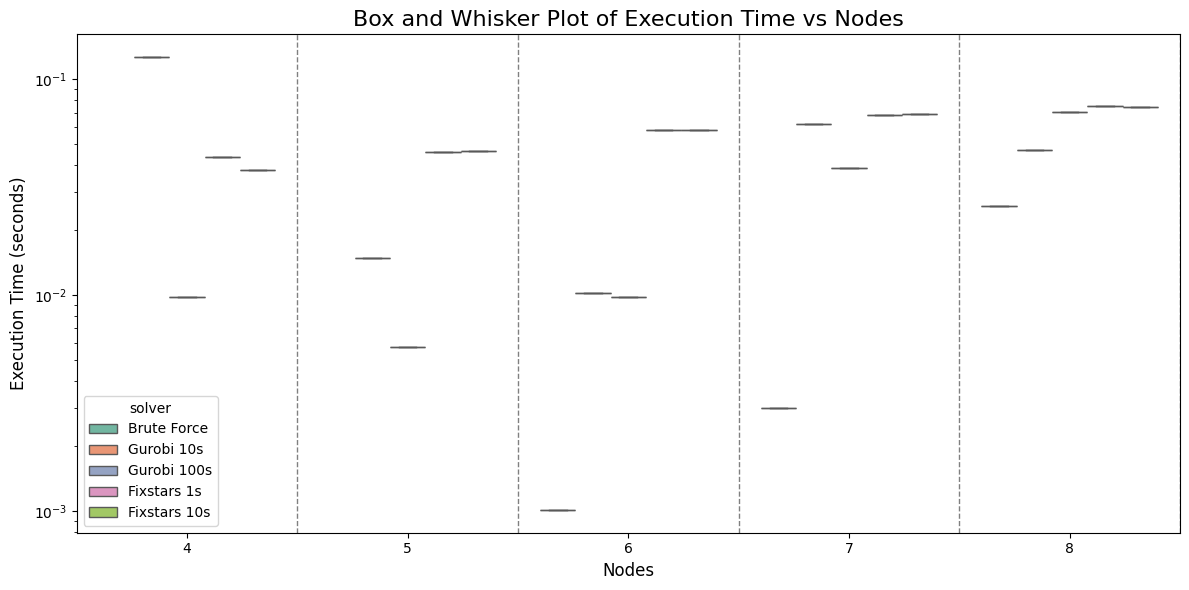

In [10]:
# Prepare data for plotting
plot_data = []
for dataset in data:
    for result in dataset["solvers_results"]:
        plot_data.append({
            "nodes": dataset["nodes"],
            "solver": result["name"],
            "execution_time": result["execution_time"]
        })

# Convert to DataFrame
df_plot = pd.DataFrame(plot_data)

# Box and Whisker Plot for execution_time vs nodes
plt.figure(figsize=(12, 6))
sns.boxplot(x="nodes", y="execution_time", hue="solver", data=df_plot, palette="Set2")

# Add title and labels
plt.title('Box and Whisker Plot of Execution Time vs Nodes', fontsize=16)
plt.xlabel('Nodes', fontsize=12)
plt.ylabel('Execution Time (seconds)', fontsize=12)

# Add vertical lines as guidelines to separate each "nodes" group
nodes = df_plot['nodes'].unique()
for node in nodes:
    plt.axvline(x=list(nodes).index(node) + 0.5, color='gray', linestyle='--', linewidth=1)

plt.yscale("log")

# Show the plot
plt.tight_layout()
plt.show()

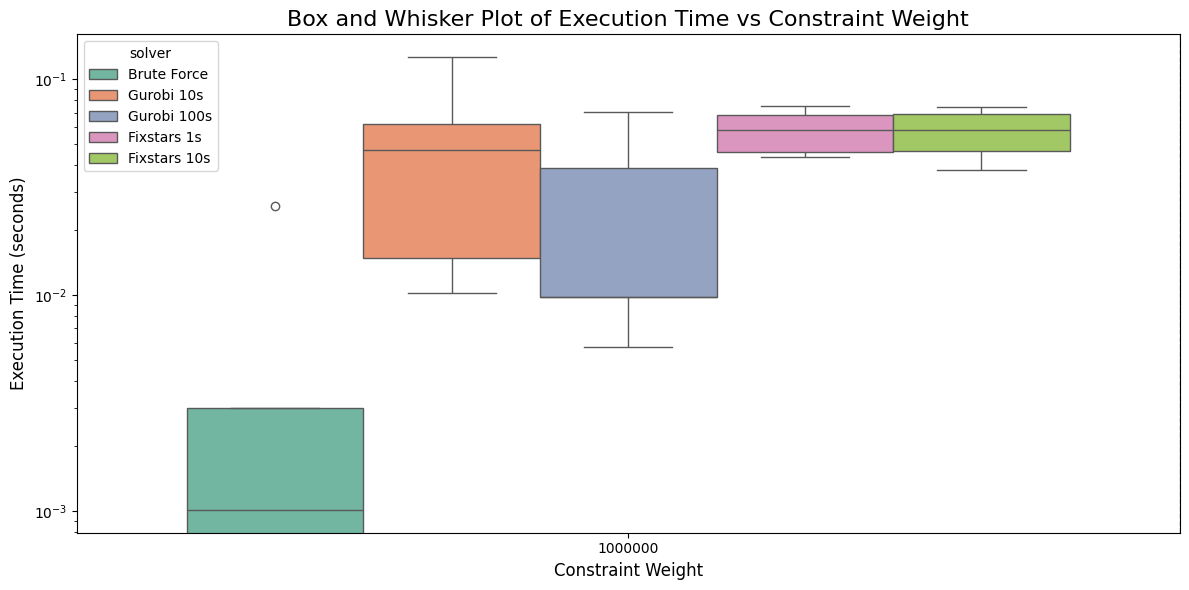

In [11]:
# Prepare data for plotting
plot_data = []
for dataset in data:
    for result in dataset["solvers_results"]:
        plot_data.append({
            "qp_weight": dataset["qp_weight"],
            "solver": result["name"],
            "execution_time": result["execution_time"]
        })

# Convert to DataFrame
df_plot = pd.DataFrame(plot_data)

# Box and Whisker Plot for execution_time vs qp_weight
plt.figure(figsize=(12, 6))
sns.boxplot(x="qp_weight", y="execution_time", hue="solver", data=df_plot, palette="Set2")

# Add title and labels
plt.title('Box and Whisker Plot of Execution Time vs Constraint Weight', fontsize=16)
plt.xlabel('Constraint Weight', fontsize=12)
plt.ylabel('Execution Time (seconds)', fontsize=12)

# Add vertical lines as guidelines to separate each "qp_weight" group
qp_weight = df_plot['qp_weight'].unique()
for node in qp_weight:
    plt.axvline(x=list(qp_weight).index(node) + 0.5, color='gray', linestyle='--', linewidth=1)

plt.yscale("log")

# Show the plot
plt.tight_layout()
plt.show()

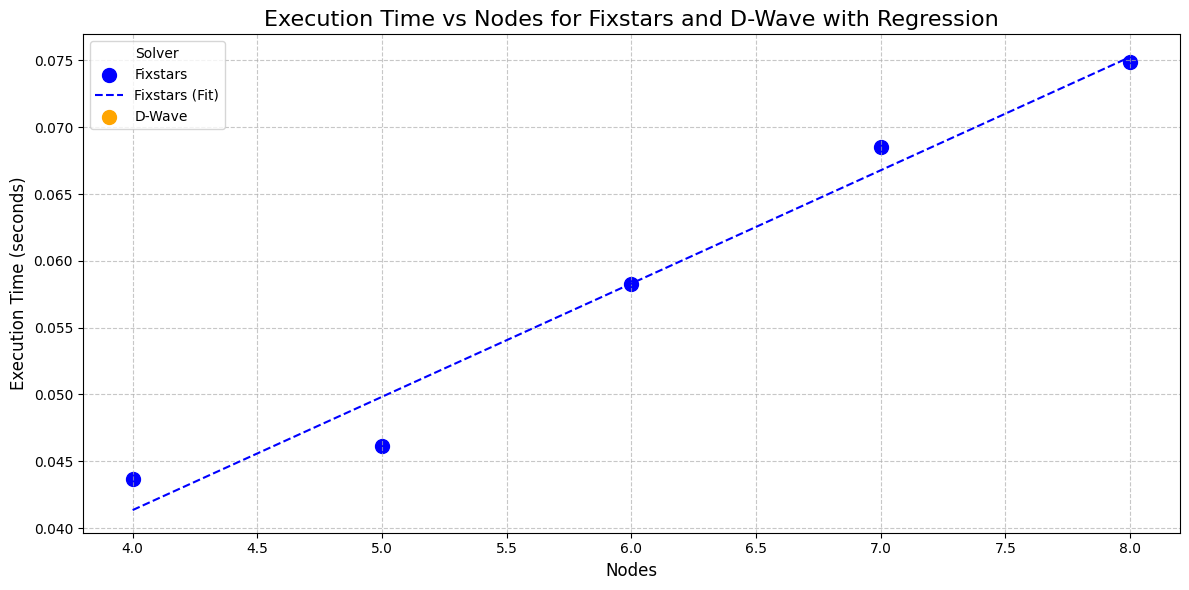

In [13]:
# Prepare data for plotting
plot_data = []
for dataset in data:
    nodes = dataset["nodes"]
    for result in dataset["solvers_results"]:
        if result["execution_time"] is not None:  # Include only valid execution times
            plot_data.append({
                "nodes": nodes,
                "solver": result["name"],
                "execution_time": result["execution_time"]
            })

# Convert to DataFrame
df_plot = pd.DataFrame(plot_data)

# Filter data for Fixstars and D-Wave
fixstars_data = df_plot[df_plot["solver"] == "Fixstars 1s"]
dwave_data = df_plot[df_plot["solver"] == "D-Wave"]

# Function to perform linear regression and get line points
def add_regression_line(x, y, ax, label, color):
    # Reshape data for sklearn
    x_reshaped = np.array(x).reshape(-1, 1)
    y = np.array(y)
    
    # Linear regression model
    model = LinearRegression()
    model.fit(x_reshaped, y)
    
    # Predict y values for regression line
    x_line = np.linspace(min(x), max(x), 100)
    y_line = model.predict(x_line.reshape(-1, 1))
    
    # Plot the regression line
    ax.plot(x_line, y_line, label=f"{label} (Fit)", color=color, linestyle='--')

# Create scatter plot with regression lines
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Plot scatter for Fixstars
plt.scatter(fixstars_data["nodes"], fixstars_data["execution_time"], label="Fixstars", color="blue", s=100)
add_regression_line(fixstars_data["nodes"], fixstars_data["execution_time"], ax, "Fixstars", "blue")

# Plot scatter for D-Wave
plt.scatter(dwave_data["nodes"], dwave_data["execution_time"], label="D-Wave", color="orange", s=100)
# add_regression_line(dwave_data["nodes"], dwave_data["execution_time"], ax, "D-Wave", "orange")

# Add labels, legend, and title
plt.title("Execution Time vs Nodes for Fixstars and D-Wave with Regression", fontsize=16)
plt.xlabel("Nodes", fontsize=12)
plt.ylabel("Execution Time (seconds)", fontsize=12)
plt.legend(title="Solver", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

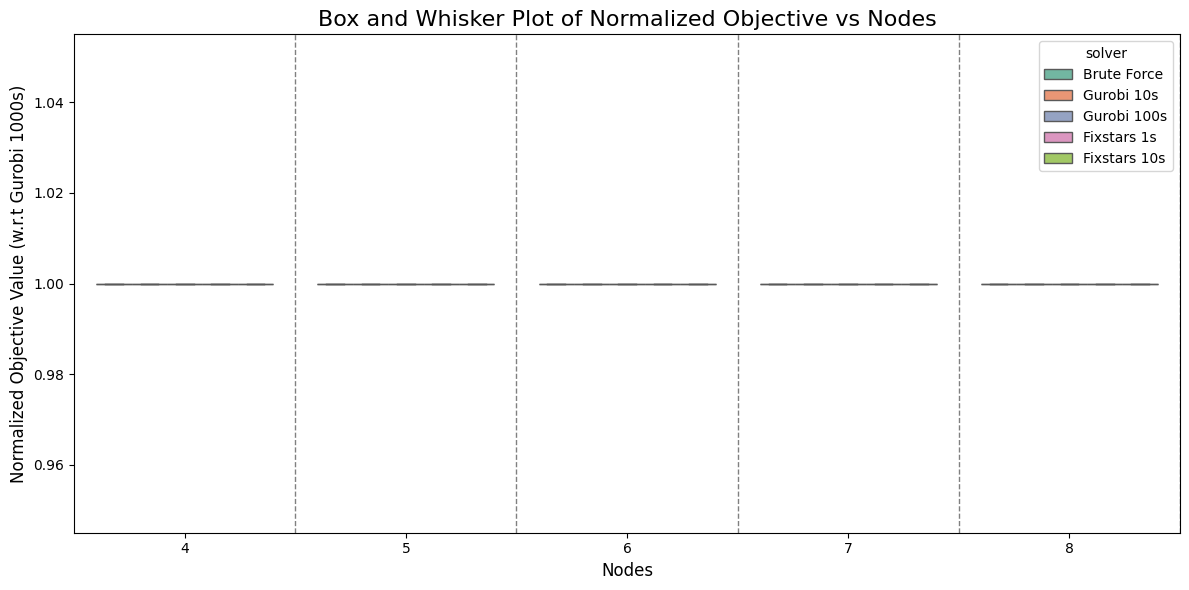

In [15]:
# Prepare data for plotting
plot_data = []
for dataset in data:
    # Extract objective value of Gurobi 1000s to normalize others
    gurobi_1000s_objective = next(
        result["objective"] for result in dataset["solvers_results"] if result["name"] == "Gurobi 100s"
    )
    
    for result in dataset["solvers_results"]:
        # Skip failed solvers where objective is None
        if result["objective"] is None:
            continue
        
        # Normalize the objective value
        normalized_objective = result["objective"] / gurobi_1000s_objective if gurobi_1000s_objective != 0 else 0
        plot_data.append({
            "nodes": dataset["nodes"],
            "solver": result["name"],
            "normalized_objective": normalized_objective
        })

# Convert to DataFrame
df_plot = pd.DataFrame(plot_data)

# Box and Whisker Plot for normalized objective vs nodes
plt.figure(figsize=(12, 6))
sns.boxplot(x="nodes", y="normalized_objective", hue="solver", data=df_plot, palette="Set2")

# Add title and labels
plt.title('Box and Whisker Plot of Normalized Objective vs Nodes', fontsize=16)
plt.xlabel('Nodes', fontsize=12)
plt.ylabel('Normalized Objective Value (w.r.t Gurobi 1000s)', fontsize=12)

# Add vertical lines as guidelines to separate each "nodes" group
nodes = df_plot['nodes'].unique()
for node in nodes:
    plt.axvline(x=list(nodes).index(node) + 0.5, color='gray', linestyle='--', linewidth=1)

# Show the plot
plt.tight_layout()
plt.show()

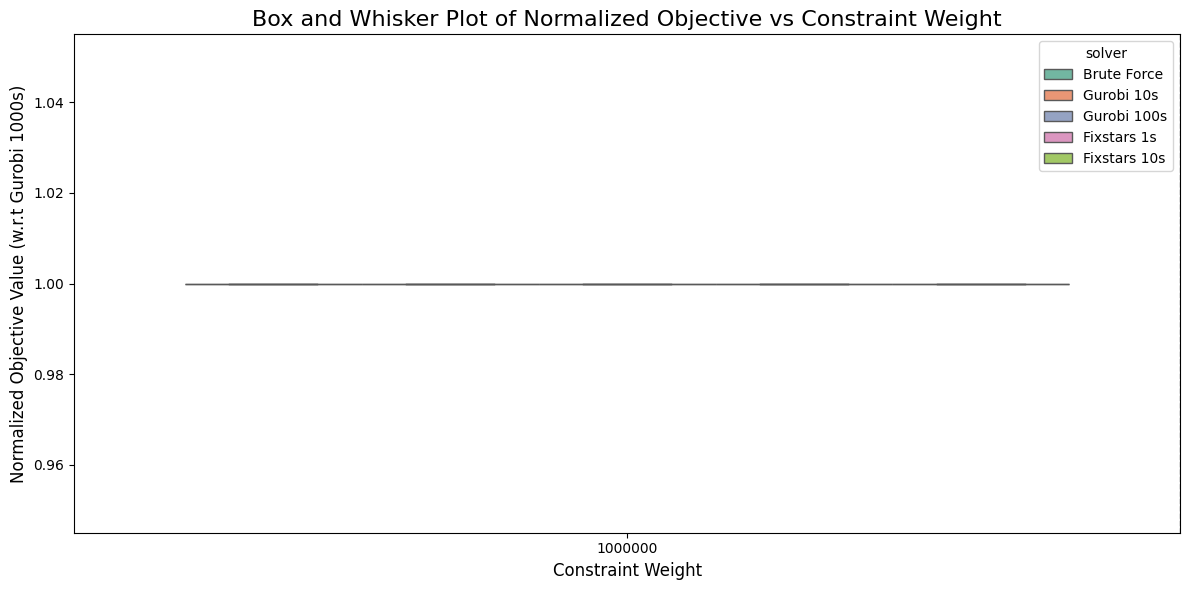

In [16]:
# Prepare data for plotting
plot_data = []
for dataset in data:
    # Extract objective value of Gurobi 1000s to normalize others
    gurobi_1000s_objective = next(
        result["objective"] for result in dataset["solvers_results"] if result["name"] == "Gurobi 100s"
    )
    
    for result in dataset["solvers_results"]:
        # Skip failed solvers where objective is None
        if result["objective"] is None:
            continue
        
        # Normalize the objective value
        normalized_objective = result["objective"] / gurobi_1000s_objective if gurobi_1000s_objective != 0 else 0
        plot_data.append({
            "qp_weight": dataset["qp_weight"],
            "solver": result["name"],
            "normalized_objective": normalized_objective
        })

# Convert to DataFrame
df_plot = pd.DataFrame(plot_data)

# Box and Whisker Plot for normalized objective vs qp_weight
plt.figure(figsize=(12, 6))
sns.boxplot(x="qp_weight", y="normalized_objective", hue="solver", data=df_plot, palette="Set2")

# Add title and labels
plt.title('Box and Whisker Plot of Normalized Objective vs Constraint Weight', fontsize=16)
plt.xlabel('Constraint Weight', fontsize=12)
plt.ylabel('Normalized Objective Value (w.r.t Gurobi 1000s)', fontsize=12)

# Add vertical lines as guidelines to separate each "qp_weight" group
qp_weight = df_plot['qp_weight'].unique()
for node in qp_weight:
    plt.axvline(x=list(qp_weight).index(node) + 0.5, color='gray', linestyle='--', linewidth=1)

# Show the plot
plt.tight_layout()
plt.show()